# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat2017_csv = '../data/sat_2017.csv'
act2017_csv = '../data/act_2017.csv'
sat2017 = pd.read_csv(sat2017_csv)
act2017 = pd.read_csv(act2017_csv)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
sat2017.shape

(51, 5)

In [6]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
act2017.shape

(52, 7)

In [8]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


act_2017.csv has an additional 'National' row when compared to sat_2017.csv.

#### 4a. Does the data look complete? 

In [9]:
sat2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [10]:
act2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer:
There are no null values in both sat_2017.csv and act_2017.csv

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [11]:
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [13]:
act2017.drop(0, axis=0).describe()
#dropped the 'National' row, but the min is too low

,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176
std,2.353677,1.981989,2.067271,3.182463
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.450000,19.900000
50%,20.700000,20.900000,21.800000,21.300000
75%,23.300000,23.100000,24.150000,22.750000
max,25.500000,25.300000,26.000000,24.900000


Answer:
Both minimum values in SAT Math and ACT Science scores are too low. There are errors reside in Maryland's scores.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [14]:
#code
sat2017.iloc[20,3] = 524
act2017.iloc[21,5] = 23.2
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [15]:
#Fixed the incorrect score in Maryland SAT Math score, from 52 to 524, and ACT Science score, from 2.3 to 23.2
act2017.drop(0, axis=0).describe()

,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.450980
std,2.353677,1.981989,2.067271,1.739353
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.450000,19.950000
50%,20.700000,20.900000,21.800000,21.300000
75%,23.300000,23.100000,24.150000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
#code
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [17]:
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
'State' and 'Participation' columns in both sat_2017.csv and act_2017.csv, and 'Composite' column in act_2017.csv are objects.
There is a need to convert these data into string or numerical values for futher analysis.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
#code

def remove_percentsign(x):
    out = x.replace('%', '')
    return float(out)
def remove_x(x):
    out = x.replace('x', '')
    return float(out)

In [19]:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#code
sat2017['Participation'] = sat2017['Participation'].apply(remove_percentsign)
act2017['Participation'] = act2017['Participation'].apply(remove_percentsign)
act2017['Composite'] = act2017['Composite'].apply(remove_x)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#code
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [22]:
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


- Display the data types again to confirm they are correct.

In [23]:
#Code:
sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [24]:
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
#code
sat2017.rename(columns={
    'State': 'state',
    'Participation': 'sat2017_participation',
    'Evidence-Based Reading and Writing': 'sat2017_ebrw',
    'Math': 'sat2017_math',
    'Total': 'sat2017_total',
}, inplace=True)

act2017.rename(columns={
    'State': 'state',
    'Participation': 'act2017_participation',
    'English': 'act2017_english',
    'Math': 'act2017_math',
    'Reading': 'act2017_reading',
    'Science': 'act2017_science',
    'Composite': 'act2017_composite',
}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Dataset|Description|Feature|Type|
|---|---|---|---|
|SAT/ACT|state|object|State.|
|SAT|sat2017_participation|float|Percentage of particpation for SAT 2017.|
|SAT|sat2017_ebrw|int|Evidence-Based Reading and Writing score for SAT 2017.|
|SAT|sat2017_math|int|Math score for SAT 2017.|
|SAT|sat2017_total|int|Total score fo SAT 2017.|
|ACT|act2017_participation|float|Percentage of particpation for ACT 2017.|
|ACT|act2017_english|float|English score for ACT 2017.|
|ACT|act2017_math|float|Math score for ACT 2017.|
|ACT|act2017_reading|float|Reading score for ACT 2017.|
|ACT|act2017_science|float|Science score for ACT 2017.|
|ACT|act2017_composite|float|Compostie score for ACT 2017.|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
#code
act2017.drop(0, axis=0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
#Code:
sat2017_act2017 = pd.merge(sat2017, act2017, how='outer',left_on='state', right_on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [28]:
#code
sat2017_act2017.to_csv('output/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
#Import the 2018 data files
sat2018_csv = '../data/sat_2018.csv'
act2018_csv = '../data/act_2018_updated.csv'
sat2018 = pd.read_csv(sat2018_csv)
act2018 = pd.read_csv(act2018_csv)

In [30]:
#Renaming the columns
sat2018.rename(columns={
    'State': 'state',
    'Participation': 'sat2018_participation',
    'Evidence-Based Reading and Writing': 'sat2018_ebrw',
    'Math': 'sat2018_math',
    'Total': 'sat2018_total',
}, inplace=True)
act2018.rename(columns={
    'State': 'state',
    'Percentage of Students Tested': 'act2018_participation',
    'Average English Score': 'act2018_english',
    'Average Math Score': 'act2018_math',
    'Average Reading Score': 'act2018_reading',
    'Average Science Score': 'act2018_science',
    'Average Composite Score': 'act2018_composite',
}, inplace=True)

In [31]:
#Standardizing the paricipation rate, converting all to float
sat2018['sat2018_participation'] = sat2018['sat2018_participation'].apply(remove_percentsign)

def int_tofloat(i):
    return float(i)
act2018['act2018_participation'] = act2018['act2018_participation'].apply(int_tofloat)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [32]:
sat2017_act2017_sat2018 = pd.merge(sat2017_act2017, sat2018, how='outer',left_on='state', right_on='state')
combined_all = pd.merge(sat2017_act2017_sat2018, act2018, how='outer',left_on='state', right_on='state')
combined_all.to_csv('output/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [33]:
#Code:
combined_all.describe()

,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,act2017_composite,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [34]:
#code
def cal_std (x):
    out =(((combined_all[x]-combined_all[x].sum()/(len(combined_all[x])))**2).sum()/(len(combined_all[x])))**0.5
    return round(out, 6)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [35]:
#Code:
combined_std = {
    'sat2017_participation': 'sat2017_participation',
    'sat2017_ebrw': 'sat2017_ebrw',
    'sat2017_math': 'sat2017_math',
    'sat2017_total': 'sat2017_total',
    'act2017_participation': 'act2017_participation', 
    'act2017_english': 'act2017_english',
    'act2017_math': 'act2017_math',
    'act2017_reading': 'act2017_reading',
    'act2017_science': 'act2017_science',
    'act2017_composite': 'act2017_composite',
    'sat2018_participation': 'sat2018_participation',
    'sat2018_ebrw': 'sat2018_ebrw',
    'sat2018_math': 'sat2018_math',
    'sat2018_total': 'sat2018_total',
    'act2018_participation': 'act2018_participation',
    'act2018_composite': 'act2018_composite',
    'act2018_english': 'act2018_english',
    'act2018_math': 'act2018_math',
    'act2018_reading': 'act2018_reading',
    'act2018_science': 'act2018_science'
}


print({k: cal_std(v) for k, v in combined_std.items()})

def np_std(x):
    out = np.std(combined_all[x])
    return round(out, 6)
print()
print({k: np_std(v) for k, v in combined_std.items()})

{'sat2017_participation': 34.929071, 'sat2017_ebrw': 45.21697, 'sat2017_math': 46.657134, 'sat2017_total': 91.583511, 'act2017_participation': 31.824176, 'act2017_english': 2.330488, 'act2017_math': 1.962462, 'act2017_reading': 2.046903, 'act2017_science': 1.722216, 'act2017_composite': 2.000786, 'sat2018_participation': 36.946619, 'sat2018_ebrw': 47.03461, 'sat2018_math': 47.301946, 'sat2018_total': 93.227424, 'act2018_participation': 33.745195, 'act2018_composite': 2.085526, 'act2018_english': 2.422254, 'act2018_math': 2.015707, 'act2018_reading': 2.145892, 'act2018_science': 1.851689}

{'sat2017_participation': 34.929071, 'sat2017_ebrw': 45.21697, 'sat2017_math': 46.657134, 'sat2017_total': 91.583511, 'act2017_participation': 31.824176, 'act2017_english': 2.330488, 'act2017_math': 1.962462, 'act2017_reading': 2.046903, 'act2017_science': 1.722216, 'act2017_composite': 2.000786, 'sat2018_participation': 36.946619, 'sat2018_ebrw': 47.03461, 'sat2018_math': 47.301946, 'sat2018_total': 

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The standard deviations calculated manually match up with numpy's std method, but not panda's describe.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [36]:
#code
#highest four(4) states' 2017 SAT participation
combined_all.sort_values('sat2017_participation',ascending=False).head(4)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,...,92.0,497,480,977,32.0,23.6,23.7,22.7,24.4,23.0
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4


In [37]:
#lowest three (3) states' 2017 SAT participation
combined_all.sort_values('sat2017_participation').head(3)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98.0,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2.0,634,607,1242,100.0,18.2,18.1,18.8,18.8,...,3.0,630,606,1236,100.0,18.6,18.2,18.1,18.9,18.6
15,Iowa,2.0,641,635,1275,67.0,21.2,21.3,22.6,22.1,...,3.0,634,631,1265,68.0,21.8,21.0,21.2,22.5,22.0


In [38]:
#highest 17 states' 2017 ACT participation
combined_all.sort_values('act2017_participation',ascending=False).head(17)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100.0,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,...,6.0,624,607,1231,100.0,19.6,19.4,19.1,19.9,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,...,8.0,541,521,1062,100.0,19.3,18.4,18.8,20.1,19.4
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,...,52.0,554,543,1098,100.0,19.1,18.0,19.3,19.5,19.2
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100.0,17.7,16.6,17.8,18.0,17.9
26,Montana,10.0,605,591,1196,100.0,19.0,20.2,21.0,20.5,...,10.0,606,592,1198,100.0,20.0,18.7,19.9,20.7,20.0


In [39]:
#lowest state's 2017 ACT participation
combined_all.sort_values('act2017_participation').head(1)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4


In [40]:
#highest five(5) states' 2018 SAT participation
combined_all.sort_values('sat2018_participation',ascending=False).head(5)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,100.0,519,506,1025,30.0,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,...,100.0,535,519,1053,26.0,25.6,26.0,24.8,26.1,24.9
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,...,100.0,505,492,998,17.0,23.2,23.7,23.1,24.5,23.4
22,Michigan,100.0,509,495,1005,29.0,24.1,23.7,24.5,23.8,...,100.0,511,499,1011,22.0,24.4,24.5,23.9,24.7,23.9
12,Idaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,...,100.0,508,493,1001,36.0,22.3,21.9,21.6,23.2,22.1


In [41]:
#lowest state's 2018 SAT participation
combined_all.sort_values('sat2018_participation').head(1)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
34,North Dakota,2.0,635,621,1256,98.0,19.0,20.4,20.5,20.6,...,2.0,640,643,1283,98.0,20.3,19.1,20.3,20.7,20.5


In [42]:
#highest 17 states' 2018 ACT participation
combined_all.sort_values('act2018_participation',ascending=False).head(17)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
17,Kentucky,4.0,631,616,1247,100.0,19.6,19.4,20.5,20.1,...,4.0,630,618,1248,100.0,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,3.0,642,649,1291,100.0,19.7,20.4,20.6,20.9,...,3.0,641,653,1294,100.0,20.5,19.8,20.3,20.6,20.8
44,Utah,3.0,624,614,1238,100.0,19.5,19.9,20.8,20.6,...,4.0,480,530,1010,100.0,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5.0,623,604,1228,100.0,19.5,19.2,20.1,19.9,...,6.0,624,607,1231,100.0,19.6,19.4,19.1,19.9,19.6
40,South Carolina,50.0,543,521,1064,100.0,17.5,18.6,19.1,18.9,...,55.0,547,523,1070,100.0,18.3,17.3,18.2,18.6,18.5
36,Oklahoma,7.0,530,517,1047,100.0,18.5,18.8,20.1,19.6,...,8.0,541,521,1062,100.0,19.3,18.4,18.8,20.1,19.4
35,Ohio,12.0,578,570,1149,75.0,21.2,21.6,22.5,22.0,...,18.0,552,547,1099,100.0,20.3,19.3,20.3,20.8,20.4
33,North Carolina,49.0,546,535,1081,100.0,17.8,19.3,19.6,19.3,...,52.0,554,543,1098,100.0,19.1,18.0,19.3,19.5,19.2
28,Nevada,26.0,563,553,1116,100.0,16.3,18.0,18.1,18.2,...,23.0,574,566,1140,100.0,17.7,16.6,17.8,18.0,17.9


In [43]:
#lowest state's 2018 ACT participation
combined_all.sort_values('act2018_participation').head(1)

,state,sat2017_participation,sat2017_ebrw,sat2017_math,sat2017_total,act2017_participation,act2017_english,act2017_math,act2017_reading,act2017_science,...,sat2018_participation,sat2018_ebrw,sat2018_math,sat2018_total,act2018_participation,act2018_composite,act2018_english,act2018_math,act2018_reading,act2018_science
19,Maine,95.0,513,499,1012,8.0,24.2,24.0,24.8,23.7,...,99.0,512,501,1013,7.0,24.0,23.8,23.6,24.7,23.4


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

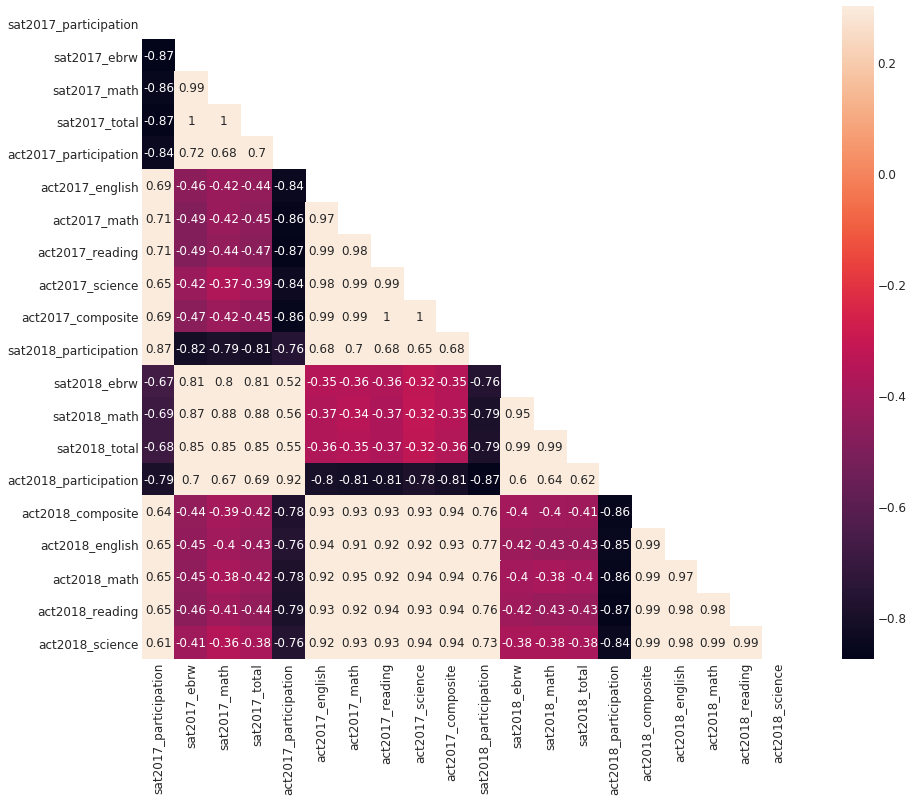

In [44]:
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 12

corr = combined_all.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

We see a checker box patter betwee SAT and ACT scores. It is an interesting observation which could be used for exploitation.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [45]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    ig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, 65)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
        # Set titles, labels, etc here for each subplot

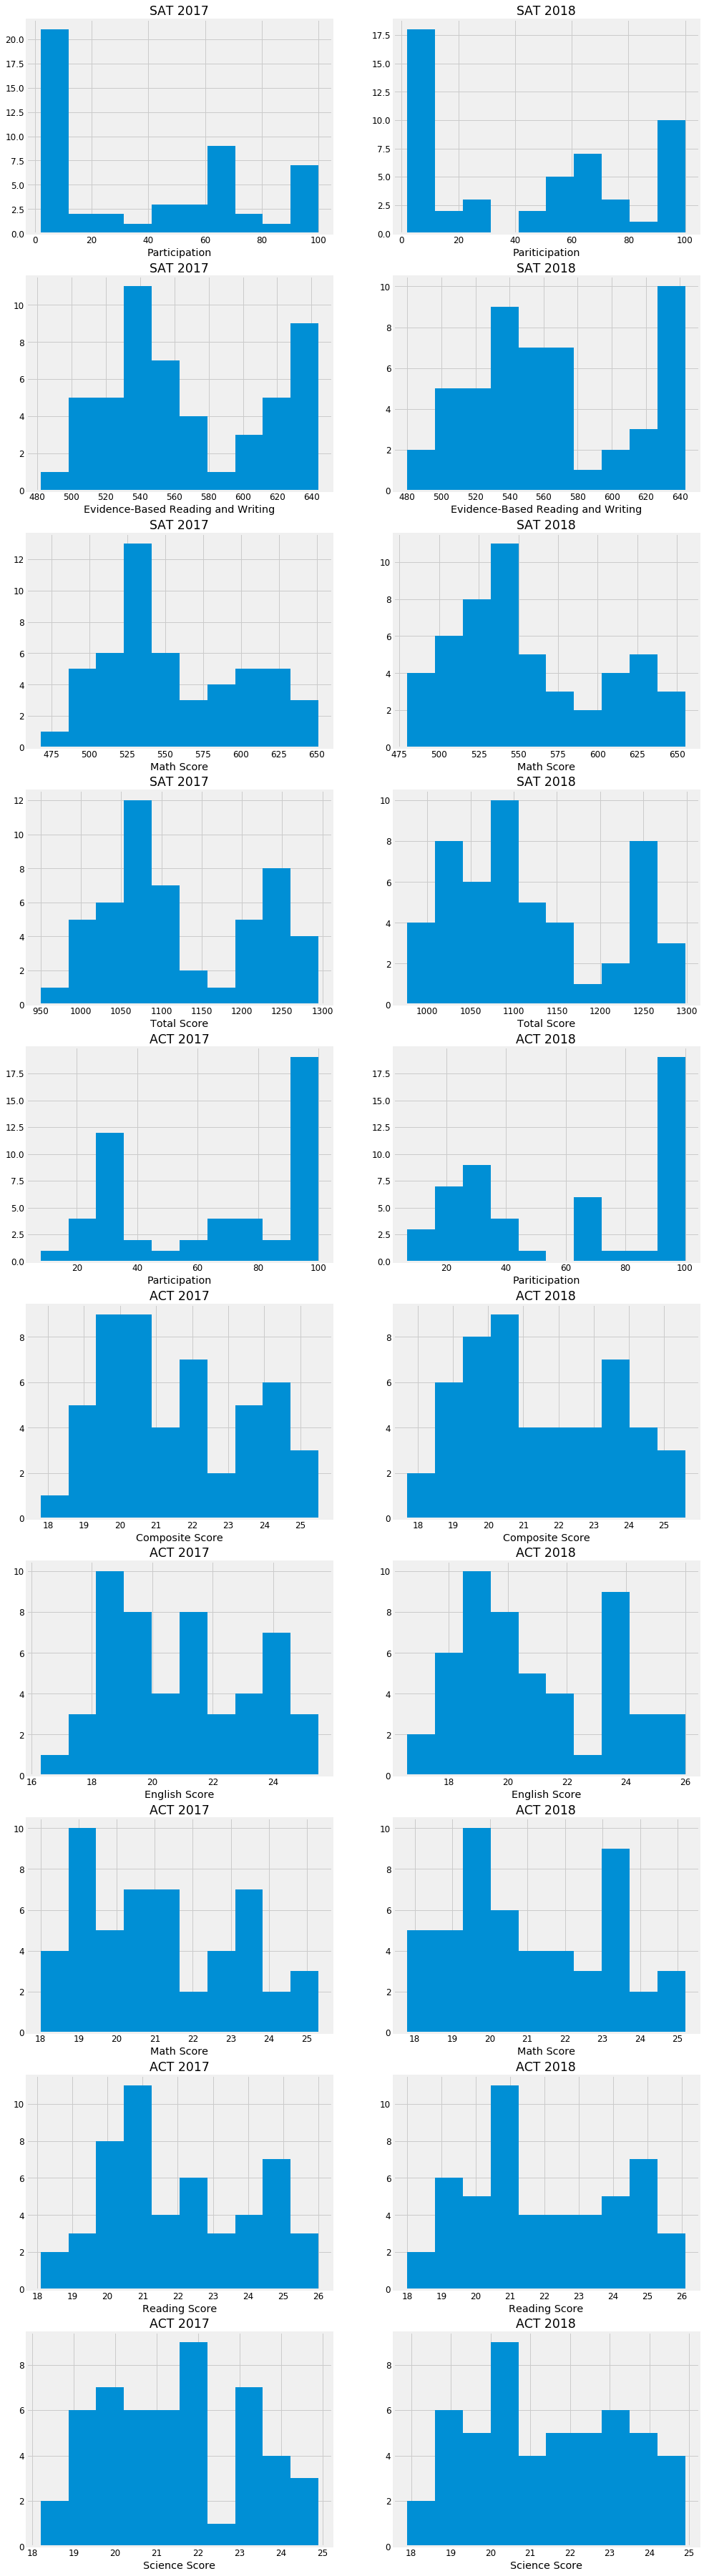

In [46]:
subplot_histograms(combined_all,
                   ['sat2017_participation','sat2018_participation',
                    'sat2017_ebrw', 'sat2018_ebrw',
                    'sat2017_math', 'sat2018_math',
                    'sat2017_total','sat2018_total',
                    'act2017_participation','act2018_participation',
                    'act2017_composite','act2018_composite',
                    'act2017_english', 'act2018_english',
                    'act2017_math', 'act2018_math',
                    'act2017_reading', 'act2018_reading',
                    'act2017_science', 'act2018_science'],
                   ['SAT 2017','SAT 2018',
                    'SAT 2017','SAT 2018',
                    'SAT 2017','SAT 2018',
                    'SAT 2017','SAT 2018',
                    'ACT 2017','ACT 2018',
                    'ACT 2017','ACT 2018',
                    'ACT 2017','ACT 2018',
                    'ACT 2017','ACT 2018',
                    'ACT 2017','ACT 2018',
                    'ACT 2017','ACT 2018'],
                   ['Participation', 'Pariticipation',
                    'Evidence-Based Reading and Writing', 'Evidence-Based Reading and Writing',
                    'Math Score', 'Math Score',
                    'Total Score', 'Total Score',
                    'Participation', 'Pariticipation',
                    'Composite Score','Composite Score',
                    'English Score','English Score',
                    'Math Score', 'Math Score',
                    'Reading Score', 'Reading Score',
                    'Science Score', 'Science Score'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

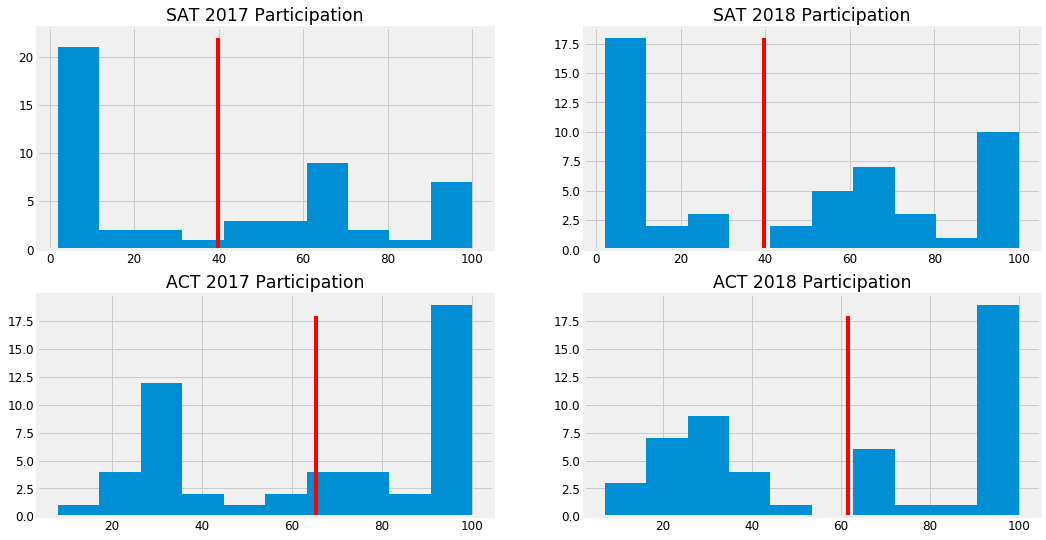

In [47]:
# Code
plt.figure(figsize = (16,9))
ax1 = plt.subplot(221)
ax1.set_title('SAT 2017 Participation')
ax1.hist(combined_all['sat2017_participation']);
ax1.vlines(x = np.mean(combined_all['sat2017_participation']), ymin = 0, ymax = 22, color = 'r');
ax2 = plt.subplot(222)
ax2.set_title('SAT 2018 Participation')
ax2.hist(combined_all['sat2018_participation']);
ax2.vlines(x = np.mean(combined_all['sat2017_participation']), ymin = 0, ymax = 18, color = 'r');
ax3 = plt.subplot(223)
ax3.set_title('ACT 2017 Participation')
ax3.hist(combined_all['act2017_participation']);
ax3.vlines(x = np.mean(combined_all['act2017_participation']), ymin = 0, ymax = 18, color = 'r');
ax4 = plt.subplot(224)
ax4.set_title('ACT 2018 Participation')
ax4.hist(combined_all['act2018_participation']);
ax4.vlines(x = np.mean(combined_all['act2018_participation']), ymin = 0, ymax = 18, color = 'r');

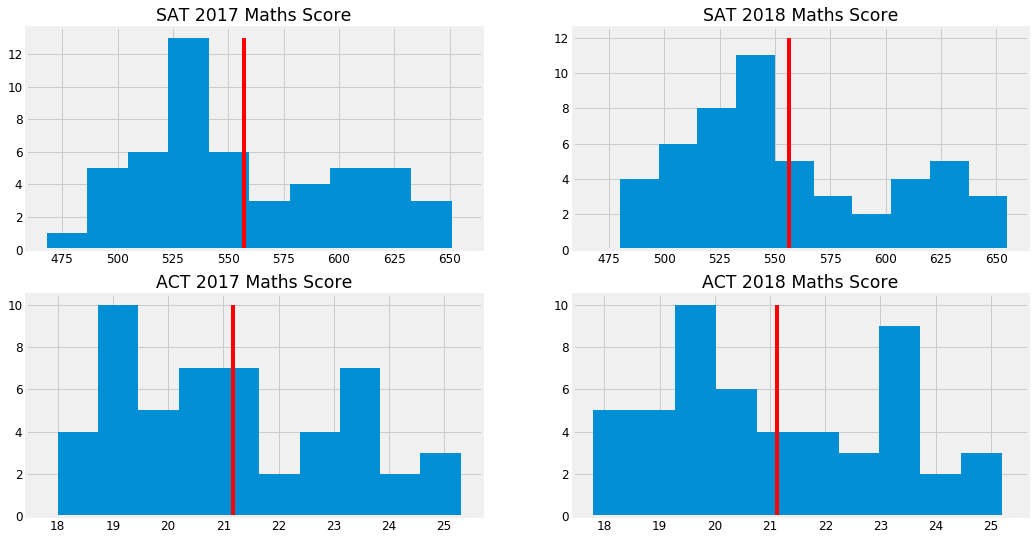

In [48]:
plt.figure(figsize = (16,9))
ax1 = plt.subplot(221)
ax1.set_title('SAT 2017 Maths Score')
ax1.hist(combined_all['sat2017_math']);
ax1.vlines(x = np.mean(combined_all['sat2017_math']), ymin = 0, ymax = 13, color = 'r');
ax2 = plt.subplot(222, sharex=ax1)
ax2.set_title('SAT 2018 Maths Score')
ax2.hist(combined_all['sat2018_math']);
ax2.vlines(x = np.mean(combined_all['sat2018_math']), ymin = 0, ymax = 12, color = 'r');
ax3 = plt.subplot(223)
ax3.set_title('ACT 2017 Maths Score')
ax3.hist(combined_all['act2017_math']);
ax3.vlines(x = np.mean(combined_all['act2017_math']), ymin = 0, ymax = 10, color = 'r');
ax4 = plt.subplot(224, sharex=ax3)
ax4.set_title('ACT 2018 Maths Score')
ax4.hist(combined_all['act2018_math']);
ax4.vlines(x = np.mean(combined_all['act2018_math']), ymin = 0, ymax = 10, color = 'r');

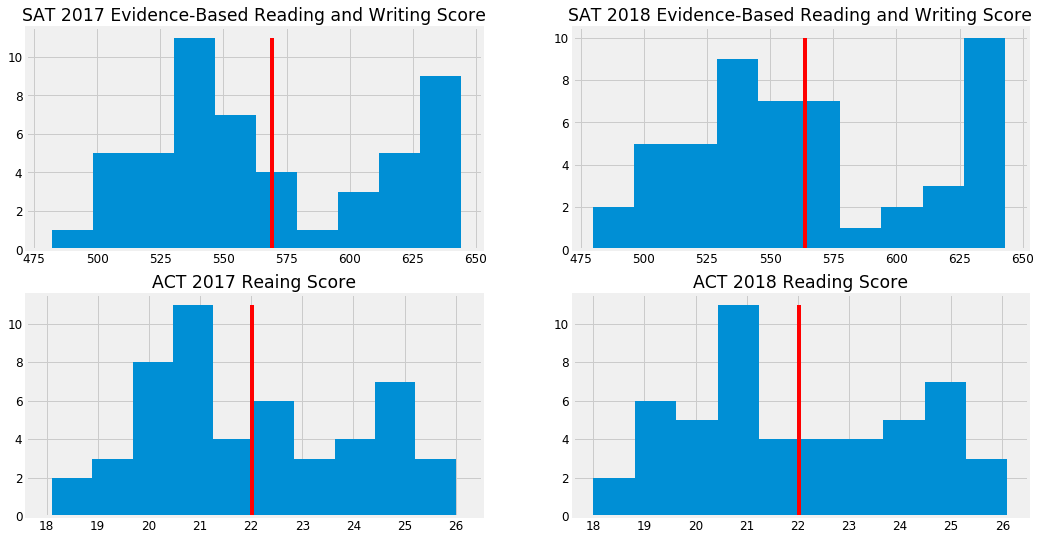

In [49]:
plt.figure(figsize = (16,9))
ax1 = plt.subplot(221)
ax1.set_title('SAT 2017 Evidence-Based Reading and Writing Score')
ax1.hist(combined_all['sat2017_ebrw']);
ax1.vlines(x = np.mean(combined_all['sat2017_ebrw']), ymin = 0, ymax = 11, color = 'r');
ax2 = plt.subplot(222, sharex=ax1)
ax2.set_title('SAT 2018 Evidence-Based Reading and Writing Score')
ax2.hist(combined_all['sat2018_ebrw']);
ax2.vlines(x = np.mean(combined_all['sat2018_ebrw']), ymin = 0, ymax = 10, color = 'r');
ax3 = plt.subplot(223)
ax3.set_title('ACT 2017 Reaing Score')
ax3.hist(combined_all['act2017_reading']);
ax3.vlines(x = np.mean(combined_all['act2017_reading']), ymin = 0, ymax = 11, color = 'r');
ax4 = plt.subplot(224, sharex=ax3)
ax4.set_title('ACT 2018 Reading Score')
ax4.hist(combined_all['act2018_reading']);
ax4.vlines(x = np.mean(combined_all['act2018_reading']), ymin = 0, ymax = 11, color = 'r');

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


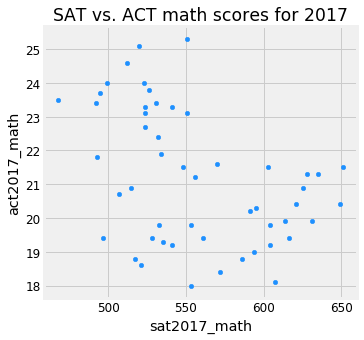

In [50]:
# Code
combined_all.plot(kind='scatter', x='sat2017_math', y='act2017_math', figsize=(5,5), title='SAT vs. ACT math scores for 2017',color='dodgerblue');

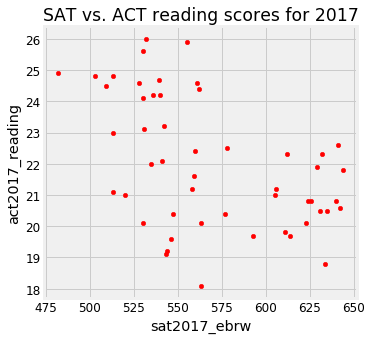

In [51]:
combined_all.plot(kind='scatter', x='sat2017_ebrw', y='act2017_reading', figsize=(5,5), title='SAT vs. ACT reading scores for 2017',color='red');

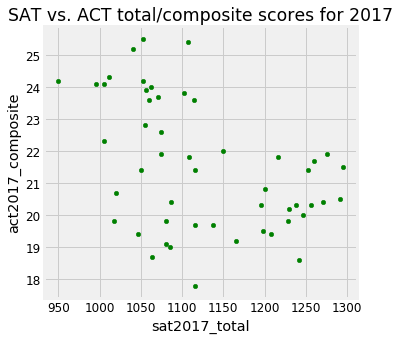

In [52]:
combined_all.plot(kind='scatter', x='sat2017_total', y='act2017_composite', figsize=(5,5), title='SAT vs. ACT total/composite scores for 2017',color='green');

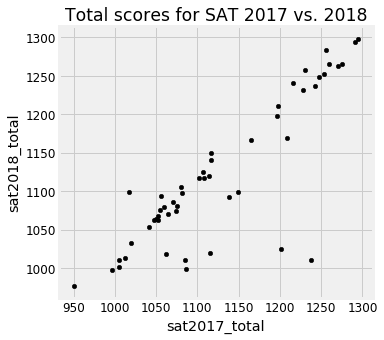

In [53]:
combined_all.plot(kind='scatter', x='sat2017_total', y='sat2018_total', figsize=(5,5), title='Total scores for SAT 2017 vs. 2018',color='black');

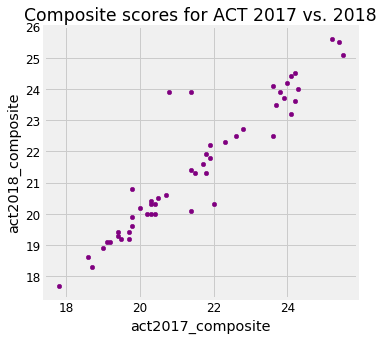

In [54]:
combined_all.plot(kind='scatter', x='act2017_composite', y='act2018_composite', figsize=(5,5), title='Composite scores for ACT 2017 vs. 2018',color='purple');

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

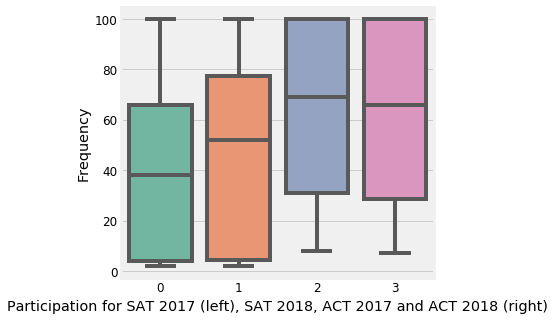

In [55]:
# Code
plt.figure(figsize=(5,5))
plt.xlabel("Participation for SAT 2017 (left), SAT 2018, ACT 2017 and ACT 2018 (right)")
plt.ylabel("Frequency")
sns.boxplot(data=(combined_all.sat2017_participation,combined_all.sat2018_participation, combined_all.act2017_participation,combined_all.act2018_participation),orient='v',palette='Set2')

We see an increase SAT 2017 and 2018 participation rates, but a drop in ACT.

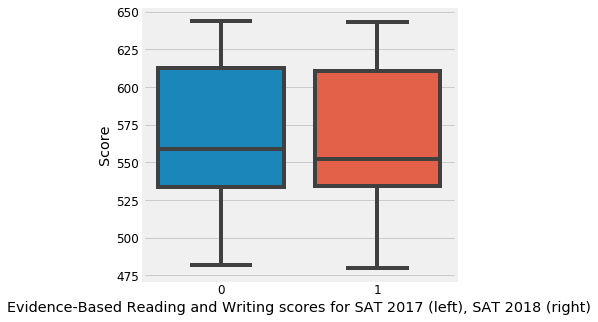

In [56]:
plt.figure(figsize=(5,5))
plt.xlabel("Evidence-Based Reading and Writing scores for SAT 2017 (left), SAT 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.sat2017_ebrw,combined_all.sat2018_ebrw),orient='v')

We see a slight drop in SAT EBRW scores.

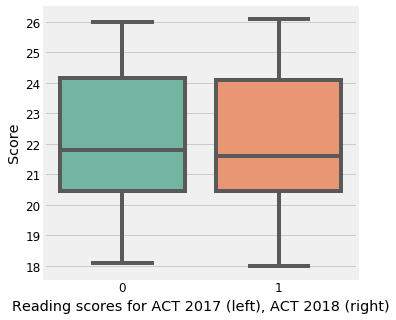

In [57]:
plt.figure(figsize=(5,5))
plt.xlabel("Reading scores for ACT 2017 (left), ACT 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.act2017_reading,combined_all.act2018_reading),orient='v',palette='Set2')

As well as ACT scores.

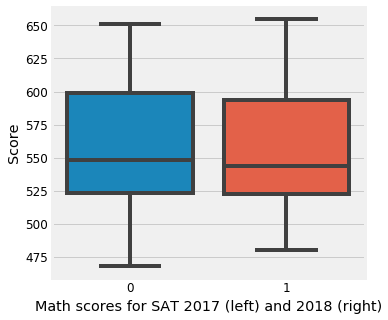

In [58]:
plt.figure(figsize=(5,5))
plt.xlabel("Math scores for SAT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.sat2017_math,combined_all.sat2018_math),orient='v')

We see a slight drop in SAT Math scores.

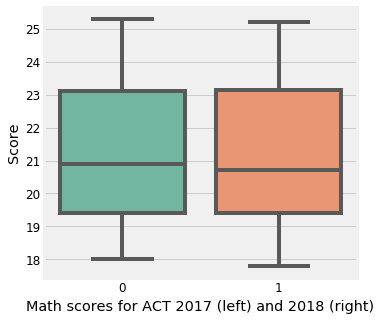

In [59]:
plt.figure(figsize=(5,5))
plt.xlabel("Math scores for ACT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.act2017_math,combined_all.act2018_math),orient='v',palette='Set2')

As well as ACT scores.

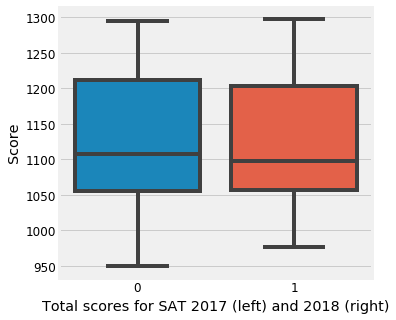

In [60]:
plt.figure(figsize=(5,5))
plt.xlabel("Total scores for SAT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.sat2017_total,combined_all.sat2018_total),orient='v')

We see a slight drop in SAT total scores.

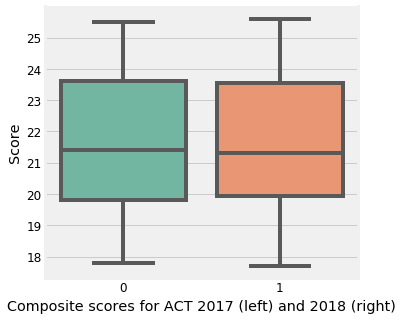

In [61]:
plt.figure(figsize=(5,5))
plt.xlabel("Composite scores for ACT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.act2017_composite,combined_all.act2018_composite),orient='v',palette='Set2')

As well as ACT scores.

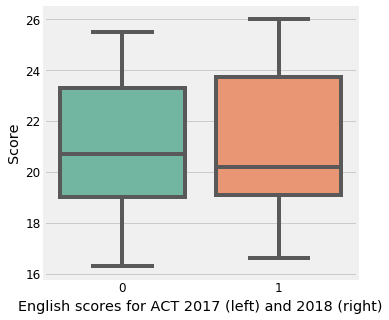

In [62]:
plt.figure(figsize=(5,5))
plt.xlabel("English scores for ACT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.act2017_english,combined_all.act2018_english),orient='v',palette='Set2')

We see a drop in ACT English scores (mean).

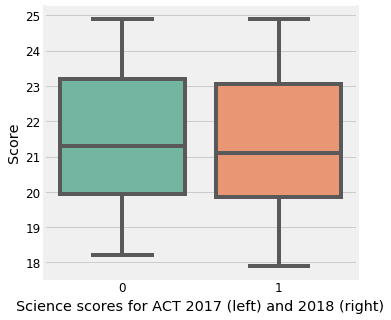

In [63]:
plt.figure(figsize=(5,5))
plt.xlabel("Science scores for ACT 2017 (left) and 2018 (right)")
plt.ylabel("Score")
sns.boxplot(data=(combined_all.act2017_science,combined_all.act2018_science),orient='v',palette='Set2')

We see a drop in ACT Science scores.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:
We see an increase SAT 2017 and 2018 participation rates, but a drop in ACT. We also see a slight drop in SAT scores from 2017 to 2018 as well as ACT, regardless of the type of test.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [64]:
#The following are not normal distribution as the p value is greater than 1e-3
print(stats.normaltest(combined_all['sat2017_math']))
print(stats.normaltest(combined_all['sat2018_math']))
print(stats.normaltest(combined_all['act2017_math']))
print(stats.normaltest(combined_all['act2018_math']))
print(stats.normaltest(combined_all['sat2018_ebrw']))
print(stats.normaltest(combined_all['act2017_reading']))
print(stats.normaltest(combined_all['act2017_reading']))
print(stats.normaltest(combined_all['sat2017_participation']))
print(stats.normaltest(combined_all['sat2018_participation']))
print(stats.normaltest(combined_all['act2017_participation']))
print(stats.normaltest(combined_all['act2018_participation']))

NormaltestResult(statistic=5.762201767738943, pvalue=0.056072998982864684)
NormaltestResult(statistic=4.8457529089366815, pvalue=0.08866620599134843)
NormaltestResult(statistic=6.547294554392776, pvalue=0.03786805958606832)
NormaltestResult(statistic=9.493830792428861, pvalue=0.008678423456739134)
NormaltestResult(statistic=8.010167731290034, pvalue=0.01822276093099164)
NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
NormaltestResult(statistic=6.248639549660324, pvalue=0.04396683079879635)
NormaltestResult(statistic=24.844012826931053, pvalue=4.028943345766873e-06)
NormaltestResult(statistic=52.62387132138218, pvalue=3.739999415853251e-12)
NormaltestResult(statistic=72.50510406893655, pvalue=1.8018419611696254e-16)
NormaltestResult(statistic=142.42948808997522, pvalue=1.1798576998141957e-31)


In [65]:
#The following is normal as the p value is lesser than 1e-3
stats.normaltest(combined_all['sat2017_ebrw'])
#However, if we look at its distribution above, we clearly see that it is not normal

NormaltestResult(statistic=13.81815328788405, pvalue=0.0009986795076584)

Answer:
No, we do not observe this trend in general. Although n meets the requirement of 30, it does not necessarily guarantee the sample to be normally distributed.

We should avoid the addition/substraction these average values if the distrubution is not normal.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
No, as the SAT and ACT populations are different. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No, as it is 2 separate populations taking 2 different papers.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [66]:
# Code:
t_stat, p_value = stats.ttest_ind(combined_all['sat2017_ebrw'], combined_all['sat2018_ebrw'], equal_var=False)
p_value

0.5574305484428674

In [67]:
t_stat, p_value = stats.ttest_ind(combined_all['sat2017_math'], combined_all['sat2017_math'], equal_var=False)
p_value

1.0

In [68]:
t_stat, p_value = stats.ttest_ind(combined_all['sat2017_total'], combined_all['sat2018_total'], equal_var=False)
p_value

0.7429291116643162

In [69]:
t_stat, p_value = stats.ttest_ind(combined_all['act2017_english'], combined_all['act2018_english'], equal_var=False)
p_value

0.9050247581688328

In [70]:
t_stat, p_value = stats.ttest_ind(combined_all['act2017_math'], combined_all['act2018_math'], equal_var=False)
p_value

0.8866378692365904

In [71]:
t_stat, p_value = stats.ttest_ind(combined_all['act2017_reading'], combined_all['act2018_reading'], equal_var=False)
p_value

0.9962790354054806

In [72]:
t_stat, p_value = stats.ttest_ind(combined_all['act2017_science'], combined_all['act2018_science'], equal_var=False)
p_value

0.7677930664739879

Answer:
There is no statistical differences between the specific SAT/ACT 2017 and 2018 scores.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Conclusion
- We see an increase SAT 2017 and 2018 participation rates, but a drop in ACT. Although there is no statistical difference between the specific SAT/ACT scores between 2017 and 2018, we saw a slight drop in the mean specific SAT/ACT scores from 2017 to 2018, regardless of the type of test.
- This is likely due to the drop in difficulty level of SAT 2018 paper, resulting in a harsh marking scheme and a drop in SAT scores. [source: https://www.compassprep.com/when-up-is-down-june-2018-sat/].
- In addition, there was a change in ACT 2018 policy. It ended the self-paced timing for students with the extended-time accommodation, which could be a set back to sutdents who qualified for extended time accomodation. This could result in the lower participation rate and test results. [source: https://www.scoreatthetop.com/blog/changes-to-the-act-2018].

Rcommendations
- In the heatmap, we see an obvious checker box pattern between SAT and ACT scores. There is an inverse correlation pattern between the SAT and ACT scores, regardless of the year. This advocates the strategy of taking both SAT and ACT tests, and using the outcomes of both test to hedge against each other so as to increase the odds of admission.
- Using total/composite 2018 score as strategy, do SAT in District of Columbia (min total score 977) and do ACT in Nevada (min composite score 17.7). Alternatively, strategize based on your strength. If strength is in reading, do in Hawaii or Utah or North Carolina. If strength is in math, do in Nevada or District of Columbia.